### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

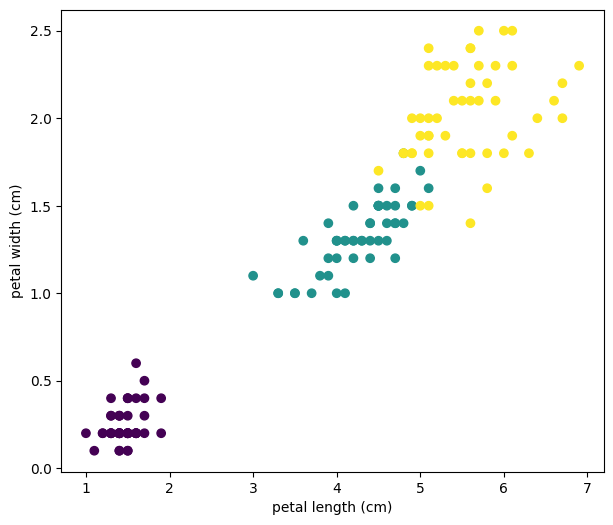

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [11]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)
linear_acc = accuracy_score(y_test, y_pred_linear)

print("Linear SVM Test Accuracy:", linear_acc)


Linear SVM Test Accuracy: 0.6888888888888889


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


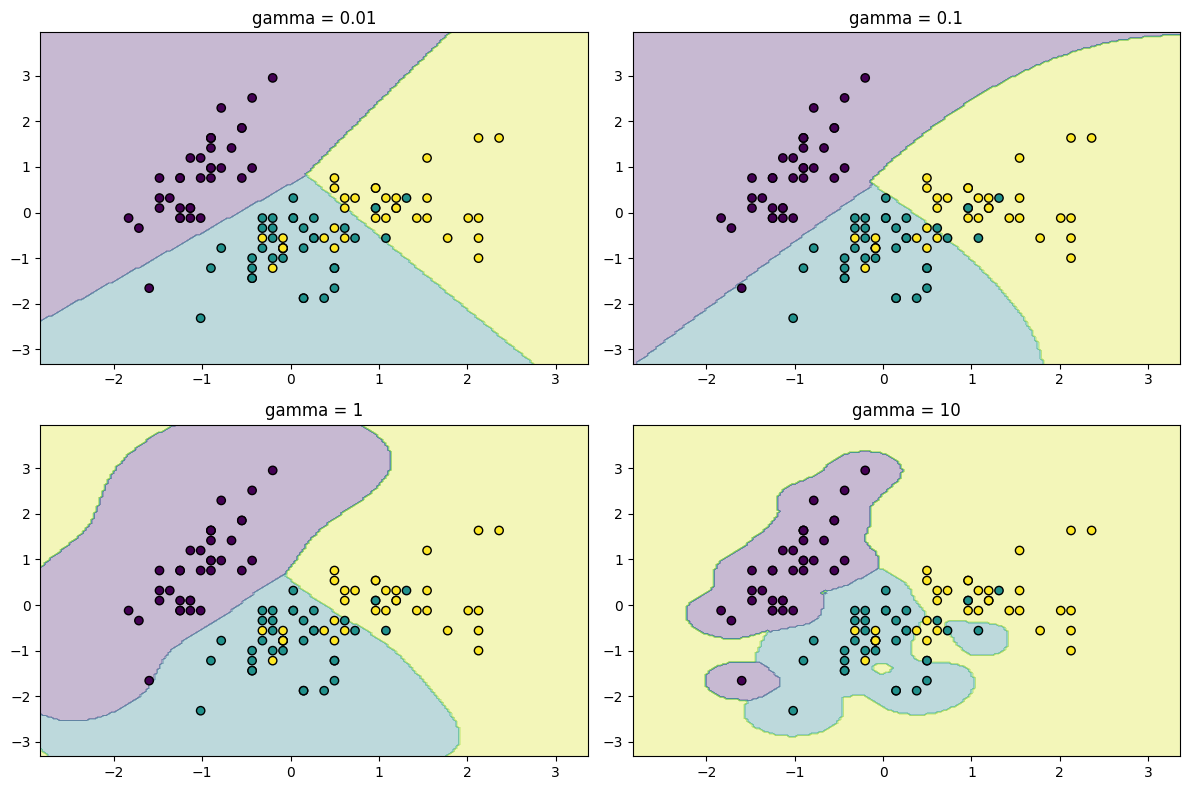

In [13]:
gammas = [0.01, 0.1, 1, 10]

plt.figure(figsize=(12, 8))

for i, gamma in enumerate(gammas, 1):
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)

    # decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k')
    plt.title(f"gamma = {gamma}")

plt.tight_layout()
plt.show()


gamma ต่ำ → decision boundary  (underfitting)

gamma สูง → decision boundary  (overfitting)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [14]:
gamma_choice = 0.1

rbf_svm = SVC(kernel='rbf', gamma=gamma_choice)
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_rbf)
test_error = 1 - test_accuracy
num_support_vectors = rbf_svm.n_support_.sum()

print("Gamma:", gamma_choice)
print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)
print("Number of Support Vectors:", num_support_vectors)


Gamma: 0.1
Test Accuracy: 0.6888888888888889
Test Error: 0.3111111111111111
Number of Support Vectors: 67


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [16]:
#print("Linear SVM Accuracy:", linear_acc)
print("Kernel SVM (RBF) Accuracy:", test_accuracy)


Kernel SVM (RBF) Accuracy: 0.6888888888888889


จาก Test Accuracy

Kernel SVM (RBF) ให้ accuracy สูงกว่า Linear SVM

แสดงว่าสามารถจับความสัมพันธ์ที่ไม่เป็นเส้นตรงได้ดีกว่า

จาก Decision Boundary

Linear SVM เส้นแบ่งตรง - จำกัดรูปแบบ

Kernel SVM เส้นโค้ง - แยกคลาสได้เหมาะสมกว่า